In [1]:
# 파이썬의 데이터 분석 패키지 Pandas(pandas.pydata.org) 를 읽어옵니다.
# Pandas는 쉽게 말해 파이썬으로 엑셀을 다룰 수 있는 툴이라고 보시면 됩니다.
# 이 패키지를 앞으로는 pd라는 축약어로 사용하겠습니다.
import pandas as pd

## Load Dataset

In [2]:
# 판다스의 read_csv로 train.csv 파일을 읽어옵니다.
# 여기서 datetime은 특별히 날짜로 해석하기 위해 parse_dates 옵션에 넣어줍니다.
# 읽어온 데이터를 train이라는 이름의 변수에 할당합니다.
train = pd.read_csv("downloads/bike_sharing/train.csv")

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# head()로 train 데이터의 상위 5개를 띄웁니다.
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# train.csv 파일을 읽어온 방식과 동일하게 test.csv를 읽어옵니다.
# 이후 이 데이터를 test라는 이름의 변수에 저장합니다.
test = pd.read_csv("downloads/bike_sharing/test.csv")

# 마찬가지로 행렬(row, column) 사이즈를 출력하고
print(test.shape)

# 전체 test 데이터에서 상위 5개만 출력합니다.
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

### Parse datetime

In [4]:
# 판다스(Pandas)의 to_datetime을 활용해 datetime 컬럼의 타입을 문자열(String)에서 날짜/시간(datetime) 데이터로 다룹니다.
train["datetime"] = pd.to_datetime(train["datetime"])

# train 데이터에 연, 월, 일, 시, 분, 초를 나타내는 새로운 컬럼을 생성합니다.
# 각각의 이름을 datetime-year/month/day/hour/minute/second라고 가정합니다.
# 이 컬럼에 날짜(datetime) 컬럼의 dt(datetime의 약자입니다) 옵션을 활용하여 연월일시분초를 따로 넣어줍니다.
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head()로 train 데이터의 상위 5개를 띄우되,
# datetime과 이와 연관된 나머지 일곱 개의 컬럼만을 출력합니다.
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


In [5]:
# train 데이터와 마찬가지로 test 데이터의 datetime 컬럼도 마찬가지로 문자열(String)에서 날짜/시간(datetime) 데이터로 다룹니다.
test["datetime"] = pd.to_datetime(test["datetime"])

# test 데이터와 train 데이터와 동일하게 연, 월, 일, 시, 분, 초 컬럼을 생성합니다.
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# .head()로 test 데이터의 상위 5개를 띄우되,
# datetime과 이와 연관된 나머지 일곱 개의 컬럼만을 출력합니다.
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(6493, 15)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-20 00:00:00,2011,1,20,0,0,0
1,2011-01-20 01:00:00,2011,1,20,1,0,0
2,2011-01-20 02:00:00,2011,1,20,2,0,0
3,2011-01-20 03:00:00,2011,1,20,3,0,0
4,2011-01-20 04:00:00,2011,1,20,4,0,0


## Explore


In [6]:
# matplotlib로 실행하는 모든 시각화를 자동으로 쥬피터 노트북에 띄웁니다.
# seaborn 도 결국에는 matplotlib를 기반으로 동작하기 때문에, seaborn으로 실행하는 모든 시각화도 마찬가지로 쥬피터 노트북에 자동적으로 띄워집니다.
%matplotlib inline

# 데이터 시각화 패키지 seaborn을 로딩합니다. 앞으로는 줄여서 sns라고 사용할 것입니다.
import seaborn as sns

# 데이터 시각화 패키지 matplotlib를 로딩합니다. 앞으로는 줄여서 plt라고 사용할 것입니다.
import matplotlib.pyplot as plt

### datetime

먼저 분석할 컬럼은 **날짜(datetime)** 컬럼입니다. 날짜 컬럼은 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 경진대회의 핵심 컬럼이라고 볼 수 있으며, 이번 경진대회에서 상위 성적을 올리고 싶다면 날짜 컬럼을 완벽하게 이해하는 것이 무엇보다도 중요합니다.

먼저 연/월/일/시/분/초에 따른 자전거 대여량을 시각화 해보겠습니다.

자, 그럼 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

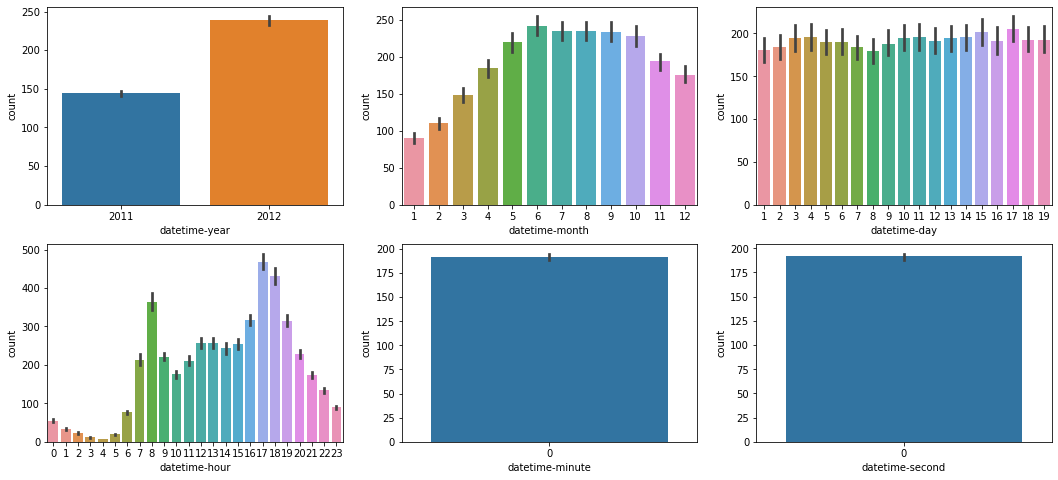

In [7]:
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 2x3으로 총 6개의 시각화를 한 화면에 띄웁니다.
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

# 시각화의 전체 사이즈는 18x8로 설정합니다.
figure.set_size_inches(18, 8)

# seaborn의 barplot으로 subplots의 각 구역에
# 연, 월, 일, 시, 분, 초 별 자전거 대여량을 출력합니다.
sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

자, 이제 더 중요한 사실에 대해서 고민해 보도록 하겠습니다.

우리에게 중요한건 데이터에 어떤 특징이 있는지 발견하는 것도 있지만, **이 특징을 활용해 앞으로 사용할 머신러닝 알고리즘을 개선시킬 수 있는가?**가 더 중요합니다. 또한 개선을 한다면 구체적으로 어떤 방식으로 개선하는지도 중요하겠죠.

이번에도 위 예상과 실제 데이터가 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

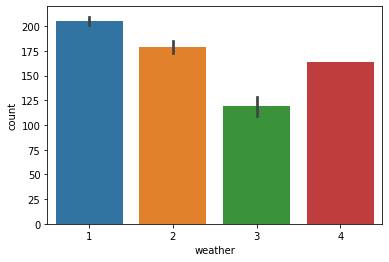

In [8]:
# seaborn의 barplot으로 날씨(weather) 데이터를 시각화합니다.
# x축에는 날씨(weather) 데이터를, y축에는 자전거 대여량(count)을 출력합니다.
sns.barplot(data=train, x="weather", y="count")

### windspeed 컬럼 분석

그 다음 분석하고 싶은 컬럼은 날씨를 나타내는 풍속을 나타내는 ```windspeed``` 컬럼입니다. 이 컬럼은 0에서 56까지의 값을 가집니다. 이 데이터도 시각화 해보도록 하겠습니다.

위 예상과 실제 데이터가 일치하는지 다시 한 번 살펴보도록 하겠습니다.

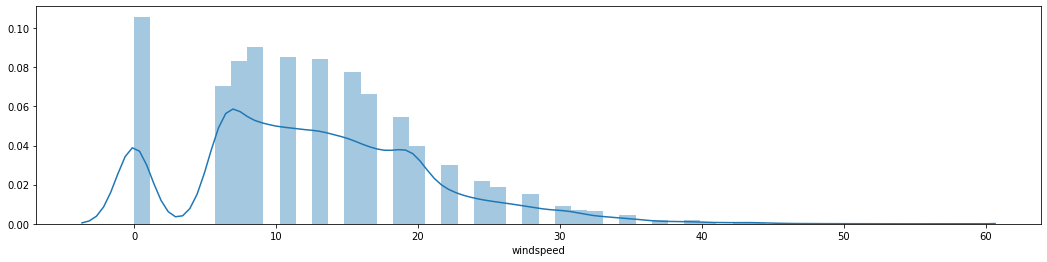

In [9]:
# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# seaborn의 distplot으로 풍속(windspeed) 데이터를 시각화합니다.
# windspeed 데이터의 전체 분포(distribution)을 시각화합니다.
sns.distplot(train["windspeed"])

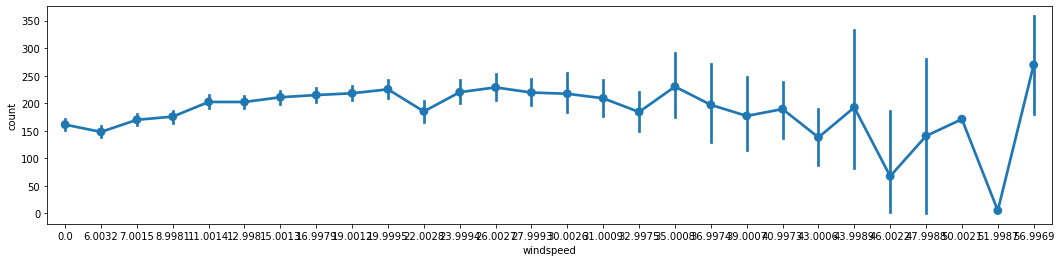

In [10]:
# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 풍속(windspeed)에 따른 자전거 대여량의 변화를 시각화합니다.
# x축에는 풍속(windspeed)을, y축에는 자전거 대여량(count)을 집어넣습니다.
sns.pointplot(data = train, x="windspeed", y="count")

[0.    0.003 0.998 0.001 1.    0.998 0.001 0.998 0.001 0.003 0.003 0.999
 0.999 0.003 0.002 0.998 0.997 0.001 0.001 0.001 0.999 0.997 0.999 0.002
 0.002 0.001 0.997 0.999]


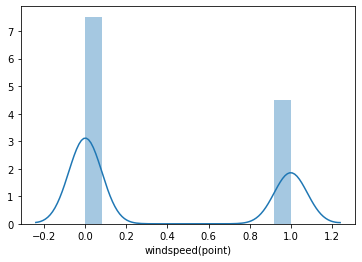

In [11]:
# 풍속(windspeed)데이터에서 소수점이 아닌 나머지를 제거합니다.
# 가령 풍속이 16.9979일 경우, 이를 정수형(int)으로 변환하여 16으로 만든 뒤 두 개를 뺍니다. (그러면 0.9979가 나옵니다)
# 이를 windspeed(point)라는 이름의 새로운 컬럼에 할당합니다.
train["windspeed(point)"] = train["windspeed"] - train["windspeed"].astype('int')

# windspeed(point) 컬럼의 중복을 제거하여 종류를 출력합니다.
# 간결할 형태로 출력하기 위해, 소수점 3자리로 줄입니다.
print(train["windspeed(point)"].unique().round(3))

# seaborn의 distplot으로 풍속(windspeed) 데이터를 시각화합니다.
# windspeed 데이터의 전체 분포(distribution)을 시각화합니다.
sns.distplot(train["windspeed(point)"])

### temp

이번에 분석할 데이터는 온도(```temp```) 컬럼입니다. 여기서부터는 제가 직접 하지 않고, 여러분들을 위한 과제로 제공하겠습니다. 앞서 컬럼들을 분석했던 것 처럼, 온도(```temp```) 컬럼도 직접 분석해보세요. 

힌트: 온도(```temp```) 컬럼만으로 좋은 분석 결과가 나오지 않는다면, 체감온도(```atemp```)를 포함한 다른 컬럼을 활용하여 시각화해보세요. 시각화는 [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot)이나 [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatterplot#seaborn.scatterplot)을 사용하면 직관적인 시각화를 할 수 있을 것입니다. (단 ```scatterplot```은 seaborn의 버전이 낮으면 실행되지 않으니 이 점 주의해주세요. 이 경우는 버전을 업그레이드 한 뒤 사용하시면 됩니다)

### temp 컬럼 시각화하기

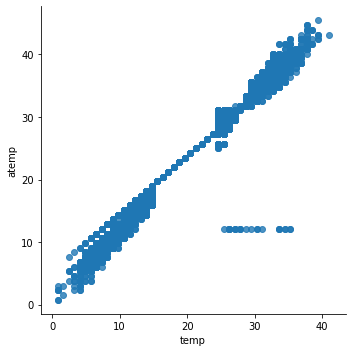

In [12]:
# seaborn의 lmplot으로 온도(temp)와 체감온도(atemp)의 상관관계를 시각화합니다.
# 여기서 추세선을 그리지 않기 위해 fit_reg 옵션은 False로 줍니다.
sns.lmplot(data=train, x="temp", y="atemp", fit_reg=False)

In [13]:
# 온도(temp)의 종류를 출력합니다. 생각보다 종류가 많지 않습니다.
train["temp"].unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [14]:
# 체감온도(atemp)의 종류를 출력합니다. 생각보다 종류가 많지 않습니다.
train["atemp"].unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

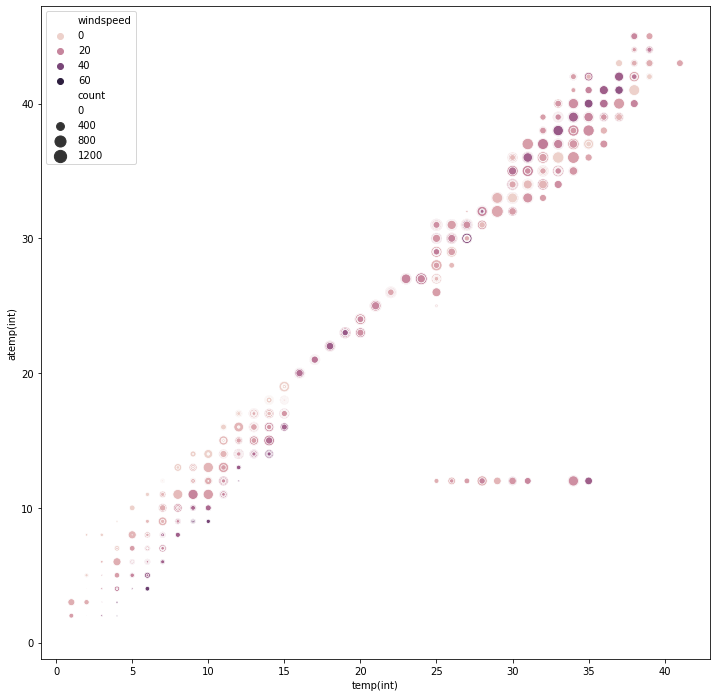

In [15]:
# 온도(temp)와 체감온도(atemp)는 반올림하여
# 각각 temp(int)와 atemp(int)라는 이름의 새로운 컬럼에 할당합니다.
train["temp(int)"] = train["temp"].round()
train["atemp(int)"] = train["atemp"].round()

# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (12, 12))

# 이번에는 scatterplot을 활용해 온도(temp), 체감온도(atemp),
# 그리고 풍속(windspeed)과 자전거 대여량(count)간의 상관관계를 시각화합니다.
# 주의: 이 코드는 seaborn의 버전이 0.9 이상이어야 합니다. 만일 실행이 되지 않는다면 seaborn의 버전을 업그레이드 해주세요.
sns.scatterplot(data=train, x="temp(int)", y="atemp(int)", hue="windspeed", size="count", sizes=(0, 150))

In [16]:
# 정수형(int)으로 변환한 온도(temp)와 체감온도(atemp)를 빼서
# 두 값의 차이를 나타내는 temp(difference)라는 새로운 컬럼을 추가합니다.
train["temp(difference)"] = train["temp(int)"] - train["atemp(int)"]

# 정수형(int)으로 변환한 온도(temp)와 체감온도(atemp), 그리고 temp(difference)를 출력합니다.
train[["temp(int)", "atemp(int)", "temp(difference)"]].head()

,temp(int),atemp(int),temp(difference)
0,10.0,14.0,-4.0
1,9.0,14.0,-5.0
2,9.0,14.0,-5.0
3,10.0,14.0,-4.0
4,10.0,14.0,-4.0


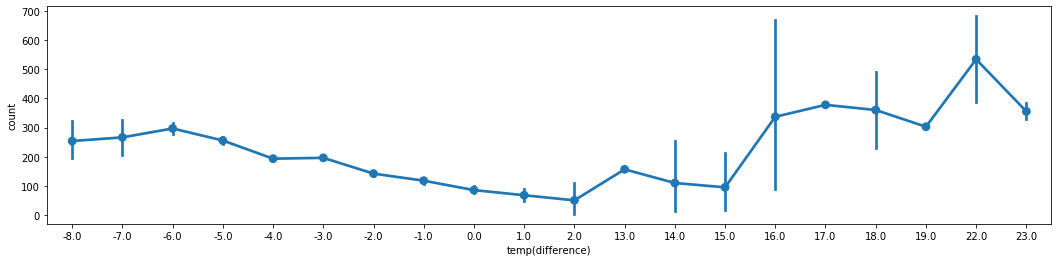

In [17]:
# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# seaborn의 point으로 temp(difference)에 따른 자전거 변화량을 시각화합니다.
sns.pointplot(data=train, x="temp(difference)", y="count")

In [18]:
# temp(difference)의 종류와 그 개수를 출력합니다.
# -6 부터 0을 제외한 나머지는 모수가 부족하므로, 이를 하나로 합쳐줘도 될 것 같습니다.
train["temp(difference)"].value_counts()

-4.0     5106
-3.0     2097
-2.0     1415
-5.0     1049
-1.0      509
-6.0      405
 0.0      219
 1.0       32
-7.0       21
 22.0       5
-8.0        5
 14.0       5
 2.0        4
 16.0       3
 15.0       3
 18.0       3
 23.0       2
 17.0       1
 13.0       1
 19.0       1
Name: temp(difference), dtype: int64

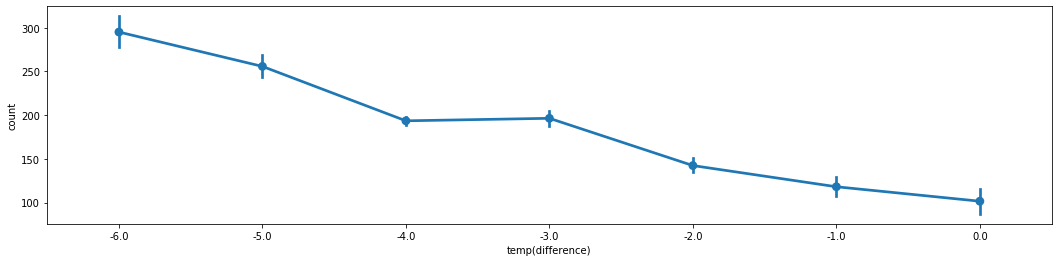

In [19]:
# temp(difference)가 -6보다 작은 데이터는 -6으로 통일시켜줍니다.
train.loc[train["temp(difference)"] < -6, "temp(difference)"] = -6

# 비슷하게, temp(difference)가 0보다 큰 데이터는 0으로 통일시켜줍니다.
train.loc[train["temp(difference)"] >  0, "temp(difference)"] = 0

# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 temp(difference)에 따른 자전거 변화량을 시각화합니다.
sns.pointplot(data=train, x="temp(difference)", y="count")

### datetime-dayofweek

이번에 분석할 데이터는 요일을 나타내는 데이터, 일명 ```datetime-dayofweek```입니다. 이 데이터는 현재 feature로 가지고 있지만, 날짜와 시간을 나타내는 ```datetime``` 컬럼에서 추출할 수 있습니다. (ex: ```train["datetime"].dt.day_name()```) 앞서 분석과 마찬가지로, 날짜 컬럼도 탐험적 데이터 분석을 통해 분석해보겠습니다.

In [20]:
# train 데이터에 요일을 나타내는 새로운 컬럼을 생성합니다.
# 이 컬럼의 이름을 datetime-dayofweek이라고 가정합니다.
# 이 컬럼에 날짜(datetime) 컬럼의 dt(datetime의 약자입니다) 옵션을 활용하여 요일 정보를 따로 넣어줍니다.
train["datetime-dayofweek"] = train["datetime"].dt.day_name()

# train 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(train.shape)

# .head()로 train 데이터의 상위 5개를 띄우되,
# datetime 컬럼과 요일(datetime-dayofweek) 컬럼만 출력합니다.
train[["datetime", "datetime-dayofweek"]].head()

(10886, 23)


,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,Saturday
1,2011-01-01 01:00:00,Saturday
2,2011-01-01 02:00:00,Saturday
3,2011-01-01 03:00:00,Saturday
4,2011-01-01 04:00:00,Saturday


In [21]:
# train 데이터와 마찬가지로 test 데이터의 datetime 컬럼에서 요일(dayofweek)정보를 뽑아냅니다.
test["datetime-dayofweek"] = test["datetime"].dt.day_name()

# test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(test.shape)

# .head()로 test 데이터의 상위 5개를 띄우되,
# datetime 컬럼과 요일(datetime-dayofweek) 컬럼만 출력합니다.
test[["datetime", "datetime-dayofweek"]].head()

(6493, 16)


,datetime,datetime-dayofweek
0,2011-01-20 00:00:00,Thursday
1,2011-01-20 01:00:00,Thursday
2,2011-01-20 02:00:00,Thursday
3,2011-01-20 03:00:00,Thursday
4,2011-01-20 04:00:00,Thursday


### datetime-dayofweek 컬럼 시각화하기

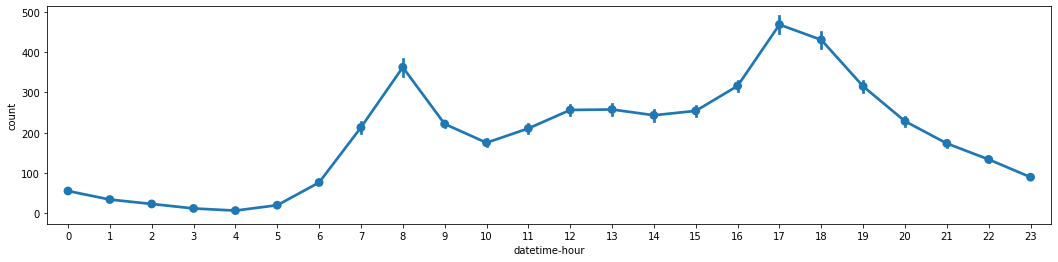

In [22]:
# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 시간(datetime-hour)에 따른 자전거 변화량을 시각화합니다.
sns.pointplot(data=train, x="datetime-hour", y="count")

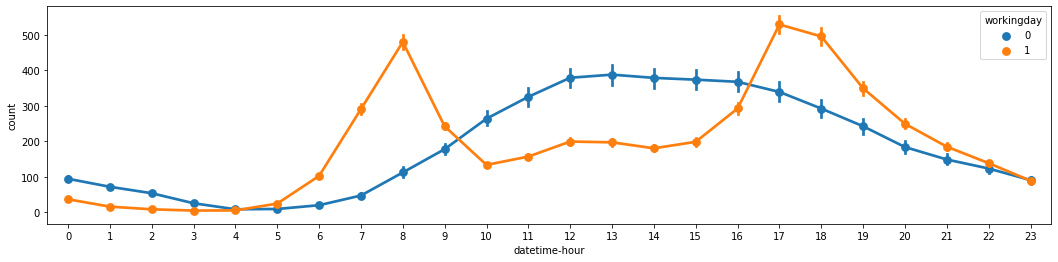

In [23]:
# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 근무일 여부(workingday)와 시간(datetime-hour)에 따른 자전거 변화량을 시각화합니다.
# 확실히 근무하는 날과 근무하지 않는 날의 자전거 대여량이 명확하게 차이가 납니다.
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday")

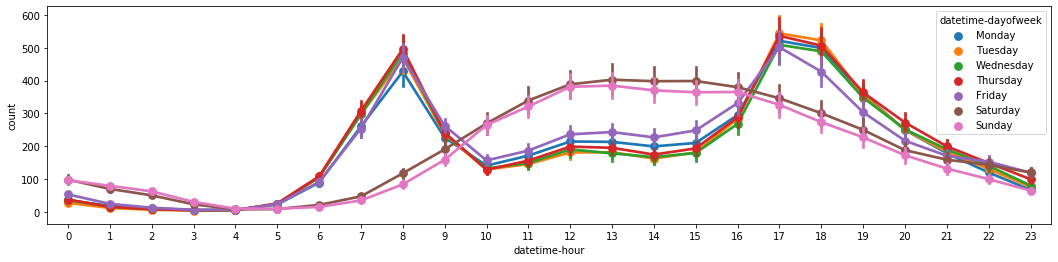

In [24]:
# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# 시각화할 때 요일의 순서를 명확하게 지정하기 위해, 월~일까지의 영어 호칭을 리스트로 담습니다.
# 이를 dayofweek_order라는 이름의 변수에 할당합니다.
dayofweek_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# seaborn의 pointplot으로 요일(datetime-dayofweek)과 시간(datetime-hour)에 따른 자전거 변화량을 시각화합니다.
# 여기서 hue의 값을 dayofweek_order에 지정된 순서대로 출력하게 합니다.
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", hue_order=dayofweek_order)

### casual & registered

이번에 분석할 데이터는 비회원과 회원을 나타내는 데이터, ```casual```과 ```registered``` 컬럼입니다. 이 컬럼을 자전거 대여량을 나타내는 ```count``` 컬럼과 거의 유사합니다. (실제로 ```casual``` 컬럼값과 ```registered``` 컬럼값을 더하면 ```count``` 컬럼값이 나옵니다)

하지만 아쉽게도 이 컬럼은 train 데이터에는 있지만 test 데이터에는 없습니다. 그러므로 이 데이터를 머신러닝 모델의 feature로 쓰는건 불가능합니다. 그렇다고 label로 쓰기에는, 우리가 맞춰야 하는 정답(=label)은 ```count``` 컬럼이죠. 하지만 그럼에도 불구하고, 이 두 개의 컬럼은 ```count``` 컬럼과 밀접한 연관이 있기 때문에, 잘 분석하고 이용한다면 머신러닝 모델의 성능을 크게 끌어올릴 수 있을 것 같습니다.

### casual과 registered 컬럼 시각화하기

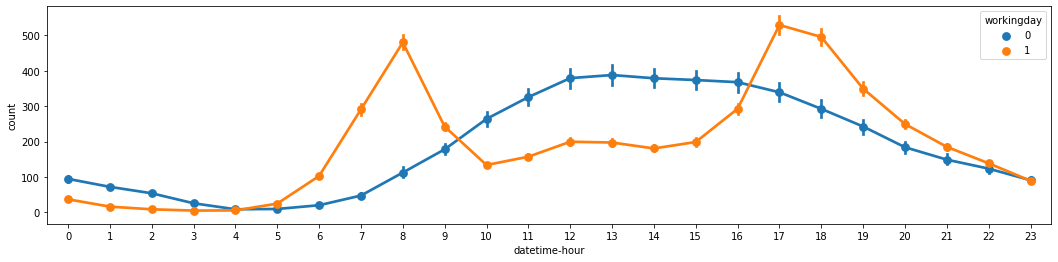

In [25]:
# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 근무일 여부(workingday)와 시간(datetime-hour)에 따른 자전거 변화량을 시각화합니다.
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday")

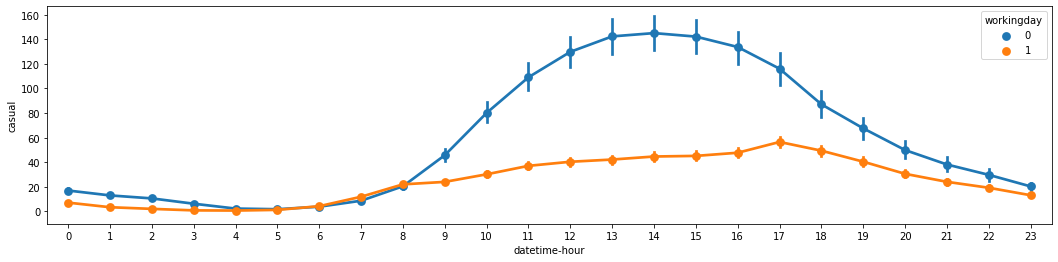

In [26]:
# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 근무일 여부(workingday)와 시간(datetime-hour)에 따른 비회원의 자전거 변화량(casual)을 시각화합니다.
sns.pointplot(data=train, x="datetime-hour", y="casual", hue="workingday")

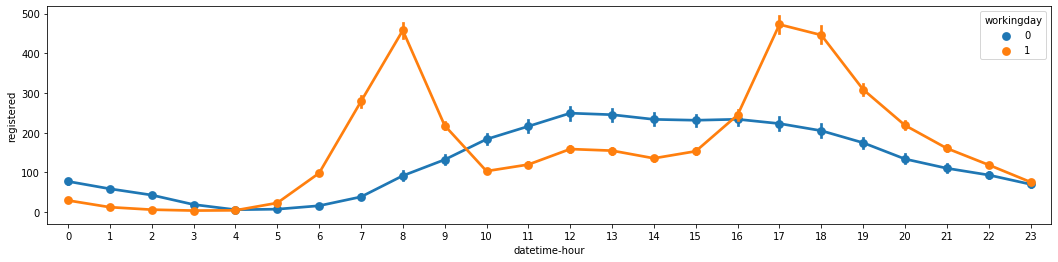

In [27]:
# matplotlib를 활용해 그래프의 사이즈를 가로로 길게(18) 늘리고, 세로로 짧게(4) 줄입니다.
plt.figure(figsize = (18, 4))

# seaborn의 pointplot으로 근무일 여부(workingday)와 시간(datetime-hour)에 따른 회원의 자전거 변화량(registered)을 시각화합니다.
sns.pointplot(data=train, x="datetime-hour", y="registered", hue="workingday")

In [28]:
train["weather(humanized)"] = train["weather"]

train.loc[train["weather"]==4,"weather(humanized)"] = 3

In [29]:
train["weather(peace)"] = train["weather"]==1
train["weather(cloud)"] = train["weather"]==2
train["weather(rain)"] = train["weather"]==3

In [30]:
test["weather(humanized)"] = test["weather"]

test.loc[test["weather"]==4,"weather(humanized)"] = 3

In [31]:
test["weather(peace)"] = test["weather"]==1
test["weather(cloud)"] = test["weather"]==2
test["weather(rain)"] = test["weather"]==3

In [32]:
train["windspeed(humanized)"]=train["windspeed"]
train.loc[train["windspeed(humanized)"]==0,"windspeed(humanized)"] = 3
train["windspeed(humanized)"]= train["windspeed(humanized)"].round()

In [33]:
test["windspeed(humanized)"]=test["windspeed"]
test.loc[test["windspeed(humanized)"]==0,"windspeed(humanized)"] = 3
test["windspeed(humanized)"]= test["windspeed(humanized)"].round()

In [34]:
train["temp(int)"] = train["temp"].round()
train["atemp(int)"] = train["atemp"].round()

train["temp(difference)"]=train["temp(int)"]-train["atemp(int)"]
train.loc[train["temp(difference)"]<-6,"temp(difference)"] =-6
train.loc[train["temp(difference)"]>0,"temp(difference)"] =0
train["temp(difference)"]=train["temp(difference)"].round()


In [35]:
test["temp(int)"] = test["temp"].round()
test["atemp(int)"] = test["atemp"].round()

test["temp(difference)"]=test["temp(int)"]-test["atemp(int)"]
test.loc[test["temp(difference)"]<-6,"temp(difference)"] =-6
test.loc[test["temp(difference)"]>0,"temp(difference)"] =0
test["temp(difference)"]=test["temp(difference)"].round()


In [36]:
train["season(spring)"] = (train["datetime-month"] == 3) |(train["datetime-month"]== 5) | (train["datetime-month"] == 4)
train["season(summer)"] = (train["datetime-month"] == 7) |(train["datetime-month"]== 6) | (train["datetime-month"] == 8)
train["season(fall)"] = (train["datetime-month"] == 10) |(train["datetime-month"]== 11) | (train["datetime-month"] == 9)
train["season(winter)"] = (train["datetime-month"] == 1) |(train["datetime-month"]== 12) | (train["datetime-month"] == 2)

In [37]:
test["season(spring)"] = (test["datetime-month"] == 4) |(test["datetime-month"]== 5) | (test["datetime-month"] == 3)
test["season(summer)"] = (test["datetime-month"] == 7) |(test["datetime-month"]== 6) | (test["datetime-month"] == 8)
test["season(fall)"] = (test["datetime-month"] == 10) |(test["datetime-month"]== 11) | (test["datetime-month"] == 9)
test["season(winter)"] = (test["datetime-month"] == 1) |(test["datetime-month"]== 12) | (test["datetime-month"] == 2)

In [38]:
train["discomfort_index"] = train["temp"]-0.55*(1-0.01*train["humidity"])*(train["temp"]-14.5)
train["discomfort_index"]= train["discomfort_index"].round()

In [39]:
test["discomfort_index"] = test["temp"]-0.55*(1-0.01*test["humidity"])*(test["temp"]-14.5)
test["discomfort_index"]= test["discomfort_index"].round()

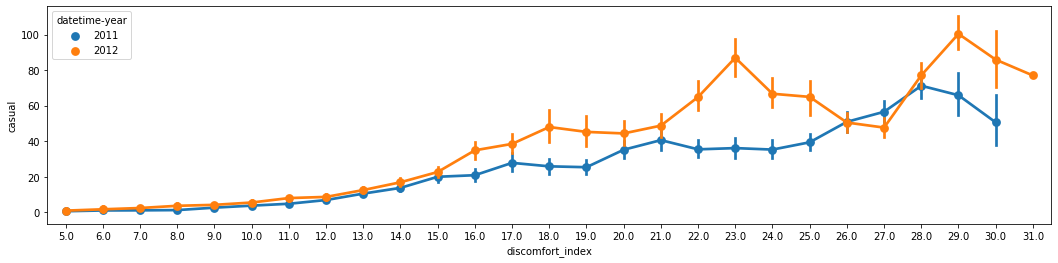

In [40]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train,x="discomfort_index", y="casual",hue="datetime-year")

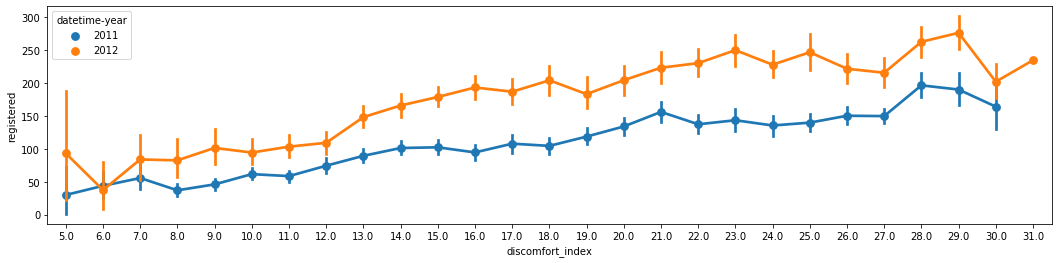

In [41]:
plt.figure(figsize=(18,4))

sns.pointplot(data=train,x="discomfort_index", y="registered",hue="datetime-year")

In [42]:
train["discomfort_index(<=15)"]= train["discomfort_index"] <= 15

In [43]:
test["discomfort_index(<=15)"]= test["discomfort_index"] <= 15

In [44]:
train["day_of_week"] = train["datetime"].dt.day_name()

In [45]:
train["Monday"] = train["day_of_week"]=="Monday"
train["Tuesday"] = train["day_of_week"]=="Tuesday"
train["Wednesday"] = train["day_of_week"]=="Wednesday"
train["Thursday"] = train["day_of_week"]=="Thursday"
train["Friday"] = train["day_of_week"]=="Friday"
train["Saturday"] = train["day_of_week"]=="Saturday"
train["Sunday"] = train["day_of_week"]=="Sunday"

In [46]:
test["day_of_week"] = test["datetime"].dt.day_name()

In [47]:
test["Monday"] = test["day_of_week"]=="Monday"
test["Tuesday"] = test["day_of_week"]=="Tuesday"
test["Wednesday"] = test["day_of_week"]=="Wednesday"
test["Thursday"] = test["day_of_week"]=="Thursday"
test["Friday"] = test["day_of_week"]=="Friday"
test["Saturday"] = test["day_of_week"]=="Saturday"
test["Sunday"] = test["day_of_week"]=="Sunday"

In [48]:
train["datetime-year_season"] = train["datetime-year"].astype('str') + '-' + train["season"].astype('str')

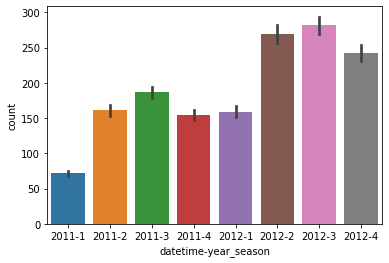

In [49]:
sns.barplot(data=train,x="datetime-year_season",y="count")

In [50]:
train["weekend"] = (train["day_of_week"]=="Saturday") | (train["day_of_week"]=="Sunday")

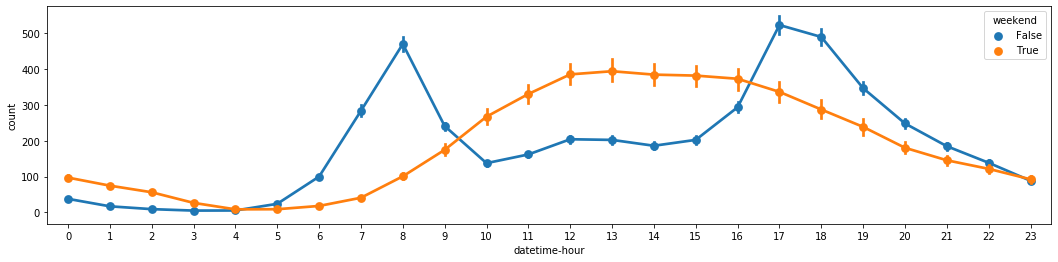

In [51]:
plt.figure(figsize = (18, 4))

sns.pointplot(data=train,x="datetime-hour", y="count",hue="weekend")

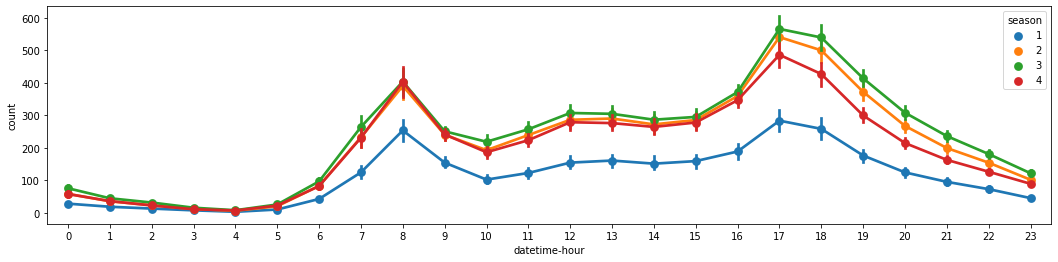

In [52]:
plt.figure(figsize = (18, 4))

sns.pointplot(data=train,x="datetime-hour", y="count",hue="season")

In [53]:
train.loc[(train["datetime-month"] == 3) |(train["datetime-month"]== 5) | (train["datetime-month"] == 4),"season(humanized)"]= 1
train.loc[(train["datetime-month"] == 6) |(train["datetime-month"]== 7) | (train["datetime-month"] == 8),"season(humanized)"]= 2
train.loc[(train["datetime-month"] == 9) |(train["datetime-month"]== 10) | (train["datetime-month"] == 11),"season(humanized)"]= 3
train.loc[(train["datetime-month"] == 2) |(train["datetime-month"]== 1) | (train["datetime-month"] == 12),"season(humanized)"]= 4

In [54]:
test.loc[(test["datetime-month"] == 3) |(test["datetime-month"]== 5) | (test["datetime-month"] == 4),"season(humanized)"]= 1
test.loc[(test["datetime-month"] == 6) |(test["datetime-month"]== 7) | (test["datetime-month"] == 8),"season(humanized)"]= 2
test.loc[(test["datetime-month"] == 9) |(test["datetime-month"]== 10) | (test["datetime-month"] == 11),"season(humanized)"]= 3
test.loc[(test["datetime-month"] == 2) |(test["datetime-month"]== 1) | (test["datetime-month"] == 12),"season(humanized)"]= 4

In [55]:
import numpy as np

In [56]:
train["log(1+casual)"] = np.log(1+train["casual"])
train["log(1+registered)"] = np.log(1+train["registered"])

In [57]:
train["log(1+count)"] = np.log(1+train["count"])

## Train

이제 분석을 통해 발견한 인사이트를 활용해보겠습니다.

이전 경진대회와 마찬가지로, 이번에도 머신러닝 알고리즘을 사용하겠습니다. 이번에도 변함없이 [지도학습(Supervised Learning)](http://solarisailab.com/archives/1785) 알고리즘을 사용할 계획이기 때문에, 데이터를 Label(맞춰야 하는 정답)과 Feature(Label을 맞추는데 도움이 되는 값들)로 나눌 필요가 있습니다.

이번 경진대회에서는 다음의 컬럼들을 Feature와 Label로 활용할 것입니다.

  * **Feature**: 1) 계절(```season```), 2) 공휴일(```holiday```), 3) 근무일(```workingday```), 4) 날씨(```weather```), 5) 온도(```temp```), 6) 체감 온도(```atemp```), 7) 습도(```humidity```), 8) 풍속(```windspeed```), 9) 연(```datetime-year```), 10) 월(```datetime-month```), 11) 일(```datetime-day```), 12) 시(```datetime-hour```), 13) 분(```datetime-minute```), 14) 초(```datetime-second```) 입니다.
  
  * **Label**: 자전거 대여량(```count```)을 사용합니다.
  
이를 통해 train 데이터와 test 데이터를 다음의 세 가지 형태의 값으로 나눌 것입니다.

  * **X_train**: train 데이터의 feature 입니다. 줄여서 X_train이라고 부릅니다.
  * **X_test**: test 데이터의 feature 입니다. 마찬가지로 줄여서 X_test라고 부릅니다.
  * **y_train**: train 데이터의 label 입니다. 마찬가지로 줄여서 y_train이라고 부릅니다.

In [58]:
feature_names=["season","season(humanized)","workingday","holiday", "weather(peace)","weather(cloud)","weather(rain)", "atemp(int)","discomfort_index", "temp(int)","temp(difference)", "humidity", "windspeed(humanized)", "datetime-year", "datetime-hour","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

feature_names

['season',
 'season(humanized)',
 'workingday',
 'holiday',
 'weather(peace)',
 'weather(cloud)',
 'weather(rain)',
 'atemp(int)',
 'discomfort_index',
 'temp(int)',
 'temp(difference)',
 'humidity',
 'windspeed(humanized)',
 'datetime-year',
 'datetime-hour',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday']

In [59]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 22)


,season,season(humanized),workingday,holiday,weather(peace),weather(cloud),weather(rain),atemp(int),discomfort_index,temp(int),...,windspeed(humanized),datetime-year,datetime-hour,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1,4.0,0,0,True,False,False,14.0,10.0,10.0,...,3.0,2011,0,False,False,False,False,False,True,False
1,1,4.0,0,0,True,False,False,14.0,10.0,9.0,...,3.0,2011,1,False,False,False,False,False,True,False
2,1,4.0,0,0,True,False,False,14.0,10.0,9.0,...,3.0,2011,2,False,False,False,False,False,True,False
3,1,4.0,0,0,True,False,False,14.0,10.0,10.0,...,3.0,2011,3,False,False,False,False,False,True,False
4,1,4.0,0,0,True,False,False,14.0,10.0,10.0,...,3.0,2011,4,False,False,False,False,False,True,False


In [60]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 22)


,season,season(humanized),workingday,holiday,weather(peace),weather(cloud),weather(rain),atemp(int),discomfort_index,temp(int),...,windspeed(humanized),datetime-year,datetime-hour,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1,4.0,1,0,True,False,False,11.0,12.0,11.0,...,26.0,2011,0,False,False,False,True,False,False,False
1,1,4.0,1,0,True,False,False,14.0,12.0,11.0,...,3.0,2011,1,False,False,False,True,False,False,False
2,1,4.0,1,0,True,False,False,14.0,12.0,11.0,...,3.0,2011,2,False,False,False,True,False,False,False
3,1,4.0,1,0,True,False,False,13.0,12.0,11.0,...,11.0,2011,3,False,False,False,True,False,False,False
4,1,4.0,1,0,True,False,False,13.0,12.0,11.0,...,11.0,2011,4,False,False,False,True,False,False,False


In [61]:
label_name = "log(1+count)"

y_train= train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: log(1+count), dtype: float64

In [62]:
label_name1 = "log(1+registered)"

y_train1= train[label_name1]

print(y_train1.shape)
y_train1.head()

(10886,)


0    2.639057
1    3.496508
2    3.332205
3    2.397895
4    0.693147
Name: log(1+registered), dtype: float64

In [63]:
label_name2 = "log(1+casual)"

y_train2= train[label_name2]

print(y_train2.shape)
y_train2.head()

(10886,)


0    1.386294
1    2.197225
2    1.791759
3    1.386294
4    0.000000
Name: log(1+casual), dtype: float64

### Use Decision Tree

X_train, X_test, y_train 데이터를 만들었으면, 이제 이 데이터를 활용하여 Decision Tree를 학습시켜 보겠습니다.

파이썬(Python) 프로그래밍 언어에서 인공지능&머신러닝에 관련된 기능을 가장 많이 보유하고 있는 건 [scikit-learn](https://scikit-learn.org/stable/) 입니다. scikit-learn에 있는 머신러닝 알고리즘에는 크게 두 가지 기능이 있습니다.

* **fit**: 머신러닝 알고리즘을 학습시킵니다. 전문용어로 fitting한다고 하기 때문에 fit이라는 표현을 사용합니다. fit을 하기 위해서는 train 데이터가 필요하며, 정확히는 train 데이터의 feature(X_train)와 label(y_train)이 필요합니다.
* **predict**: **fit**이 끝나면, 이후에 **predict**를 통해 예측을 할 수 있습니다. predict를 하기 위해서는 test 데이터가 필요하며, 정확히는 test 데이터의 feature(X_test)가 필요합니다.

이 두 가지 기능만 숙지하고 있으면 언제 어디서든 머신러닝 알고리즘을 활용할 수 있습니다.

In [64]:
# scikit-learn == sklearn

from sklearn.ensemble import RandomForestRegressor

#model=RandomForestRegressor(random_state=4,n_estimators=1000,min_samples_split = 11)
model=RandomForestRegressor(random_state=4)

model


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=4, verbose=0,
                      warm_start=False)

In [65]:
max_features = np.random.uniform(0.1,1.0)
max_features

0.48204444657290957

In [66]:
# 파이썬의 선형대수 패키지인 Numpy를 가져옵니다.
# 이를 줄여서 np라는 축약어로 사용합니다.
import numpy as np

# scikit-learn 패키지의 ensemble 모듈에 있는 RandomForestRegressor를 가지고 옵니다.
from sklearn.ensemble import RandomForestRegressor

# scikit-learn 패키지의 model_selection 모듈에 있는 cross_val_predict 함수를 가지고 옵니다.
from sklearn.model_selection import cross_val_predict

# scikit-learn의 metrics 모듈에서 mean_squared_log_error라는 이름의 함수를 가져옵니다.
# 이 함수는 앞서 설명한 RMSLE에서 R(Root)를 제외한 나머지 부분을 계산해줍니다.
from sklearn.metrics import mean_squared_log_error

In [67]:
# n_estimators는 트리의 갯수입니다.
# 보통은 높을수록 좋지만, 그만큼 실행 속도가 오래 걸리기 때문에 이번에는 적당한 값을 주겠습니다. (300 개)
# 나머지 하이퍼패리미터가 전부 튜닝되면, 그 다음에는 n_estimators를 최대한 높이 주면 됩니다. (ex: 1,000 개)
n_estimators = 300

# 랜덤 서치를 반복할 횟수입니다.
# 보통 100번을 반복합니다.
num_epoch = 100

# hyperparameter 탐색 결과를 리스트로 저장합니다.
coarse_hyperparameters_list = []

# num_epoch 횟수만큼 랜덤 서치를 반복합니다.
for epoch in range(num_epoch):
    # 2에서 100 사이의 정수형(int) 값을 랜덤하게 생성하여 max_depth 변수에 할당합니다.
    max_depth = np.random.randint(low = 2, high = 100)

    # 0.1에서 1.0 사이의 실수형(float) 값을 랜덤하게 생성하여  max_features 변수에 할당합니다.
    max_features = np.random.uniform(low = 0.1, high = 1.0)

    # Random Forest를 생성합니다. 옵션은 다음과 같습니다.
    # 1) n_estimators. 트리의 갯수입니다.
    # 2) max_depth. 트리의 깊이입니다. 지정한 숫자만큼 트리가 깊게 가지를 뻗습니다.
    # 3) max_features. Feature Sampling입니다. 0.0 ~ 1.0 사이의 값을 넣으면, 트리를 생성할 때 전체 feature에서 지정한 비율만큼만 feature를 사용합니다.
    # 4) n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
    # 5) random_state. 랜덤포레스트의 결과가 랜덤하게 나오는 것을 고정하는 옵션입니다. 아무 숫자나 넣어주면 됩니다. (공학 용어에서 쓰이는 Seed Number와 동일한 개념입니다)
    model = RandomForestRegressor(n_estimators = n_estimators,
                                  max_depth = max_depth,
                                  max_features = max_features,
                                  n_jobs = -1,
                                  random_state = 37)

    # 주어진 모델(랜덤포레스트)를 활용하여 Cross Validation을 합니다.
    # Cross Validation을 할 때는 cross_val_predict라는 함수를 사용하며, 이 함수에는 다음의 옵션이 들어갑니다.
    # 1) model. 점수를 측정할 머신러닝 모델(현재는 Random Forest)이 들어갑니다.
    # 2) X_train. train 데이터의 feature 입니다.
    # 3) y_train. train 데이터의 label 입니다.
    # 4) cv. Cross Validation에서 데이터를 조각낼(split) 갯수입니다. 총 20조각을 내야하기 때문에 20을 대입합니다.
    # 단, 이 Cross Validation을 할 때는 count 컬럼 하나를 사용하는게 아니라,
    # count, casual, registered 컬럼 세 개를 따로 예측합니다.
    # 또한 count, casual, registered 세 개를 그냥 사용하지 않고, log + 1 연산을 한 결과를 사용합니다.
    y_predict_log_casual = cross_val_predict(model, X_train, y_train2, cv = 20)
    y_predict_log_registered = cross_val_predict(model, X_train, y_train1, cv = 20)
    y_predict_log_count = cross_val_predict(model, X_train, y_train, cv = 20)

    # 위 Cross Validation을 통해 얻은 예측값을, exp - 1 연산을 함으로서
    # 다시 원래 자전거 대여량으로 변환시킵니다.
    y_predict_casual = np.exp(y_predict_log_casual) - 1
    y_predict_registered = np.exp(y_predict_log_registered) - 1
    y_predict_count = np.exp(y_predict_log_count) - 1

    # 이 결과를 기하평균을 통해 하나로 합칩니다.
    # 이렇게 하면 결과적으로 train 데이터의 자전거 대여량의 예측값이 나옵니다.
    # 이 예측값을 y_predict라는 변수에 할당합니다.
    y_predict = np.sqrt((y_predict_casual + y_predict_registered) * y_predict_count)

    # train 데이터의 label에 해당하는 y_train과, train 데이터의 label의 예측값인 y_predict를 활용하여
    # Mean Squared Logarithmic Error(MSLE)를 계산합니다.
    # 이후 여기에 numpy의 sqrt(square root)를 활용하여 루트 연산을 합니다.
    # 이 결과가 사실상 Root Mean Squared Logarithmic Error(RMSLE)가 됩니다.
    # 이를 score라는 이름의 변수에 할당합니다.
    score = mean_squared_log_error(y_train_count, y_predict)
    score = np.sqrt(score)
    
    # hyperparameter 탐색 결과를 딕셔너리화 합니다.
    hyperparameters = {
        'epoch': epoch,
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    }

    # hyperparameter 탐색 결과를 리스트에 저장합니다.
    coarse_hyperparameters_list.append(hyperparameters)

    # hyperparameter 탐색 결과를 출력합니다.
    print(f"{epoch:2} n_estimators = {n_estimators}, max_depth = {max_depth:2}, max_features = {max_features:.6f}, Score = {score:.5f}")

# coarse_hyperparameters_list를 Pandas의 DataFrame으로 변환합니다.
coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

# 변환한 coarse_hyperparameters_list를 score가 낮은 순으로 정렬합니다.
# (RMSE는 score가 낮을 수록 더 정확도가 높다고 가정합니다)
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

# coarse_hyperparameters_list 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(coarse_hyperparameters_list.shape)

# coarse_hyperparameters_list의 상위 10개를 출력합니다.
coarse_hyperparameters_list.head(10)

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model,X_train, y_train,cv = 20)

print(y_predict.shape)
y_predict

In [ ]:
from sklearn.model_selection import cross_val_predict

y_predict1 = cross_val_predict(model,X_train, y_train1,cv = 20)

print(y_predict1.shape)
y_predict1

In [ ]:
from sklearn.model_selection import cross_val_predict

y_predict2 = cross_val_predict(model,X_train, y_train2,cv = 20)

print(y_predict.shape)
y_predict2

In [ ]:
y_predict3 = (np.exp(y_predict1))-1+(np.exp(y_predict2))-1

In [ ]:
y_predict4 = np.sqrt((y_predict3)*((np.exp(y_predict))-1))

In [ ]:
from sklearn.metrics import mean_squared_log_error

score = mean_squared_log_error(y_train , np.log(1+y_predict4))

score

In [ ]:
import numpy as np
# 계산공식 패키지
score = np.sqrt(score)

print(f"Score = {score:5f}")

## Fit

머신러닝 모델을 가져왔으면, 이제 가져온 머신러닝 모델을 학습할 시간입니다.

앞서 설명한대로 머신러닝 모델의 ```fit``` 함수로 학습을 시킵니다. 학습을 할 때는 1) train 데이터의 feature인 ```X_train```, 그리고 2) train 데이터의 label인 ```y_train```이 필요합니다.

In [ ]:
model.fit(X_train,y_train)

In [ ]:
prediction_list = model.predict(X_test)

print(prediction_list.shape)
prediction_list

In [ ]:
model.fit(X_train,y_train1)

## Predict

머신러닝 알고리즘을 성공적으로 학습시켰다면, 남은 것은 이 알고리즘을 활용해 test 데이터에 있는 자전거 대여량을  예측하는 것입니다. 예측은 ```model.predict```로 할 수 있으며, 이 때 test 데이터의 feature인 ```X_test```가 필요합니다.

In [ ]:
prediction_list1 = model.predict(X_test)

print(prediction_list1.shape)
prediction_list1

In [ ]:
model.fit(X_train,y_train2)

In [ ]:
prediction_list2 = model.predict(X_test)

print(prediction_list2.shape)
prediction_list2

In [ ]:
prediction_list3= (np.exp(prediction_list1))-1+(np.exp(prediction_list2))-1 
prediction_list4 = ((np.log(prediction_list3+1))+(prediction_list))/2
prediction_list5 = (np.exp(prediction_list4))-1
prediction_list5

## Submit

머신러닝 알고리즘을 활용해서 우리는 test 데이터에 있는 자전거 대여량(count)을 예측하였습니다. 이제 우리에게 남은 건 이를 캐글([kaggle](http://kaggle.com/))이 권장하는 제출(submission) 포멧에 맞게 정리한 뒤 파일로 저장하는 것입니다.

캐글의 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 경진대회에서는 **sampleSubmission.csv**라는 제출 포멧을 제공합니다. ([다운로드 링크](https://www.kaggle.com/c/bike-sharing-demand/data)) 우리는 우리가 예측한 값을 이 제출 포멧에 맞게 집어넣고 저장할 것입니다.

In [95]:
submit = pd.read_csv("downloads/bike_sharing/sampleSubmission.csv")

submit["count"]= prediction_list5
print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.169991
1,2011-01-20 01:00:00,6.124330
2,2011-01-20 02:00:00,3.713127
3,2011-01-20 03:00:00,2.921537
4,2011-01-20 04:00:00,2.652127


In [96]:
submit.to_csv("downloads/bike_sharing/baseline-script.csv",index=False)